In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [4]:

from sklearn.linear_model import LinearRegression

###### 1 prepare data

X = np.array([
   # area, rooms, age, dist
    [70, 3, 15, 5],
    [90, 4, 10, 7],
    [60, 2, 20, 3],
    [120, 5, 5, 10],
    [80, 3, 12, 6],
    [110, 4, 8, 8],
    [100, 4, 7, 5],
    [75, 3, 18, 4],
    [95, 4, 9, 6],
    [130, 5, 3, 12]
])
Y = np.array([1200, 1500, 1100, 1800, 1300, 1650, 1750, 1250, 1550, 1900])

# Fit the model
model = LinearRegression()

from sklearn.model_selection import train_test_split

###### 2 train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

###### 3 train

model.fit(X_train, Y_train)

print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficients (β₁, β₂, β₃, β₄): {model.coef_}")

###### 4 evaluation

# Get coefficients
print("========== ev. Train")
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
train_r2 = r2_score(Y_train, y_pred_train)
print(train_r2)

print("========== ev. Test")
test_r2 = r2_score(Y_test, y_pred_test)
print(test_r2)




Intercept (β₀): 728.62
Coefficients (β₁, β₂, β₃, β₄): [ 12.16596537  32.17562254 -16.03435193 -46.5027247 ]
========== ev. Train
0.9912232864474665
========== ev. Test
-1.16822476119001


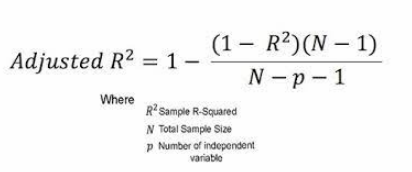

In [11]:
# R² המתוקנן
#                 (1 - R²)(n - 1)
#    R²adj =  1 - ---------------  
#                    n - p - 1
#  n = observations
#  p = features

# only for training!
def get_adj_r2(train_r2, X_train):
    # i.e. X_train.shape == (8, 4) -> 8 rows 4 features
    n = X_train.shape[0]
    p = X_train.shape[1]
    result = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)
    return result

print("train_r2", train_r2)
print("adj_r2  ", get_adj_r2(train_r2, X_train))
    

train_r2 0.9912232864474665
adj_r2   0.9795210017107552
